In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the retail price optimization data
file_path = '/Users/wahidurrahman/Downloads/retail_price.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its shape
data_shape = data.shape
data_head = data.head()

In [4]:
data_head

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [5]:
data_shape

(676, 30)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [8]:
any(data.isna().sum() > 0)

False

EDA

In [10]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


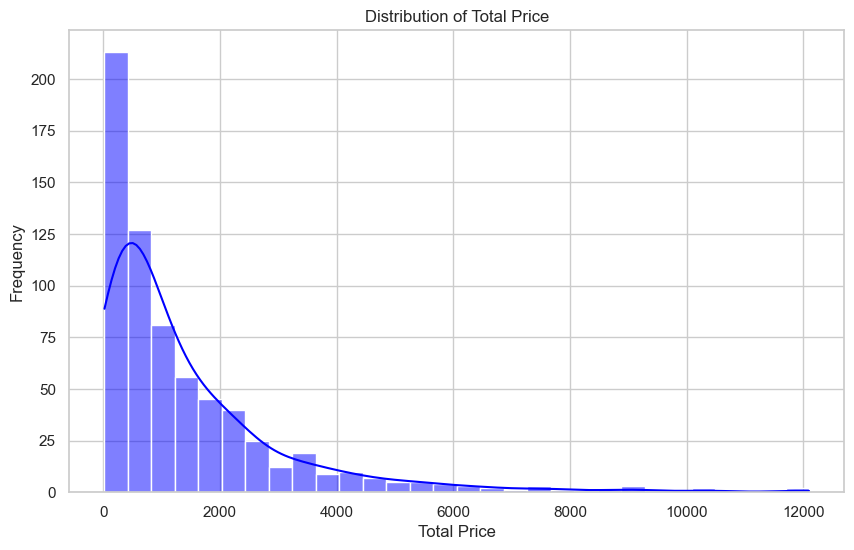

In [11]:
# Distribution of Total Price
plt.figure(figsize=(10, 6))
sns.histplot(data['total_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


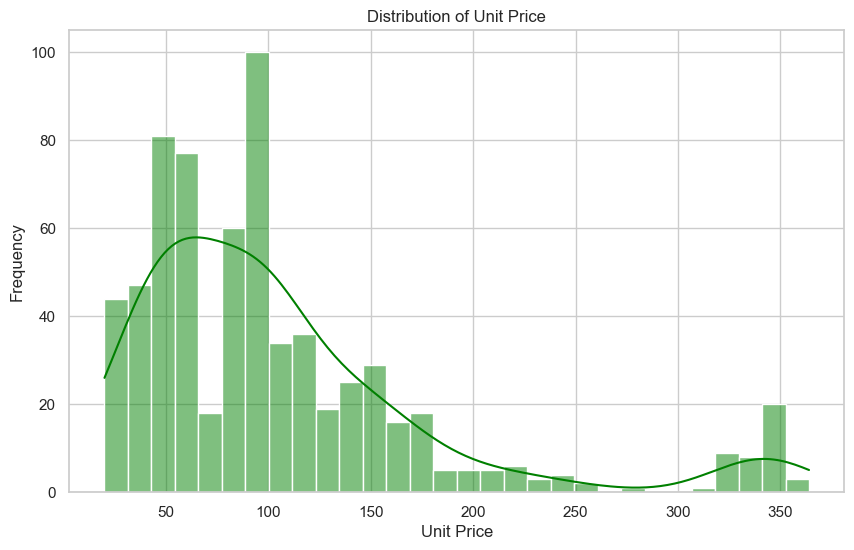

In [12]:
# Distribution of Unit Price
plt.figure(figsize=(10, 6))
sns.histplot(data['unit_price'], bins=30, kde=True, color='green')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

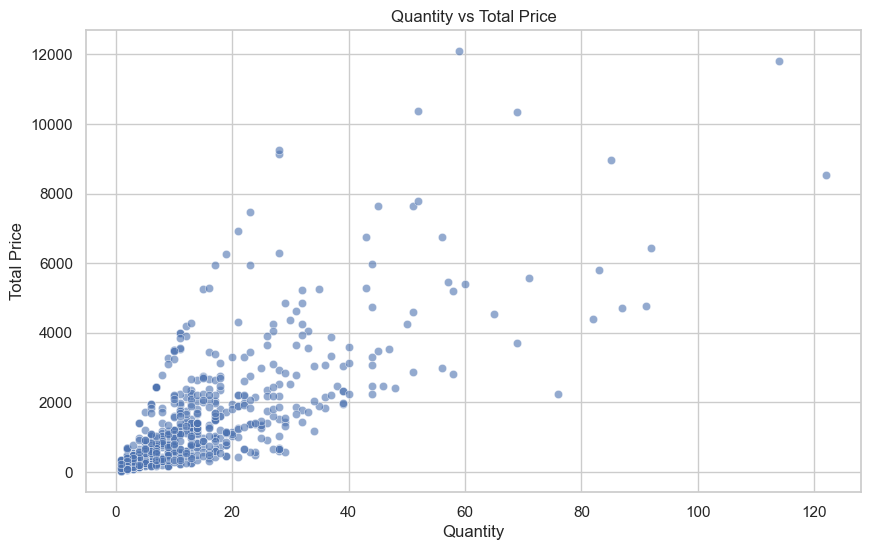

In [13]:
# Quantity vs Total Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='total_price', data=data, alpha=0.6)
plt.title('Quantity vs Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

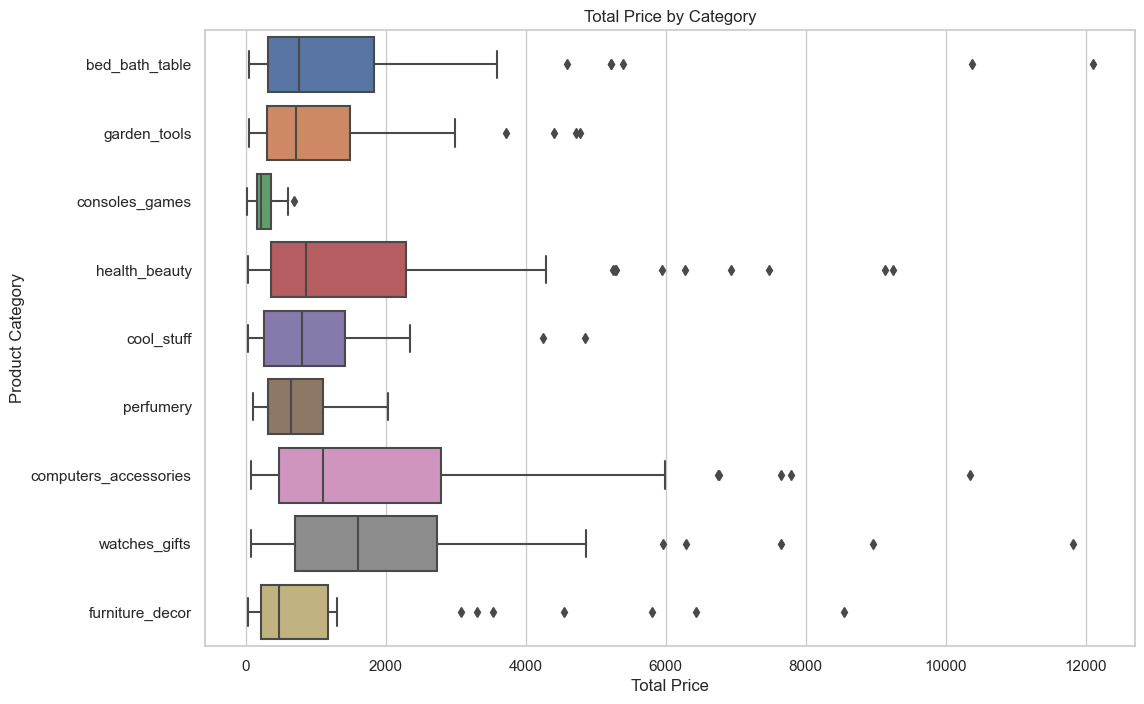

In [14]:
# Total Price by Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='total_price', y='product_category_name', data=data)
plt.title('Total Price by Category')
plt.xlabel('Total Price')
plt.ylabel('Product Category')
plt.show()

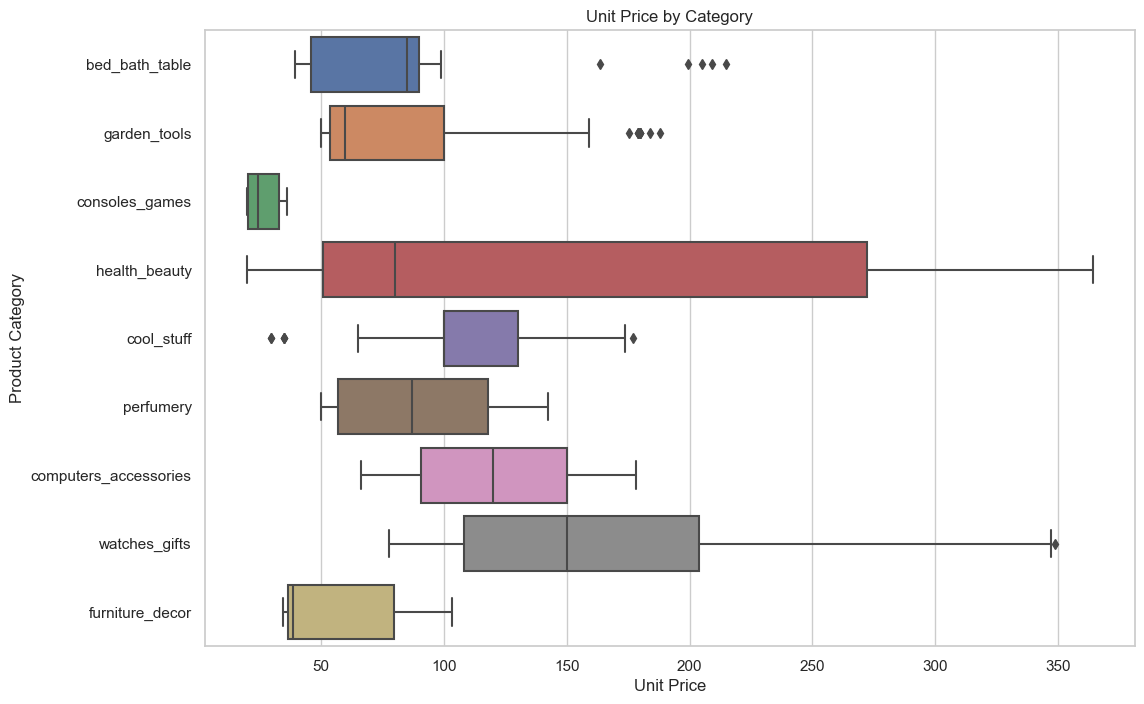

In [15]:
# Unit Price by Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='unit_price', y='product_category_name', data=data)
plt.title('Unit Price by Category')
plt.xlabel('Unit Price')
plt.ylabel('Product Category')
plt.show()

In [16]:
# Convert 'month_year' to datetime format for time series analysis
data['month_year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y')

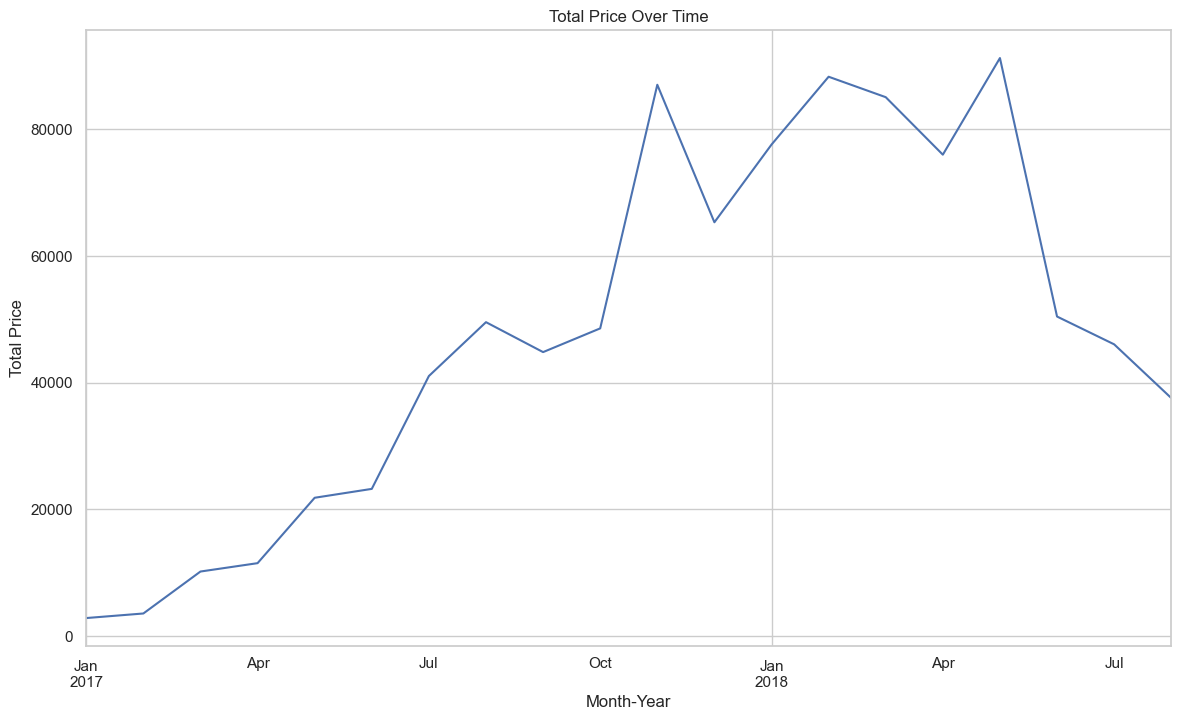

In [17]:
# Time Series Analysis: Total Price Over Time
plt.figure(figsize=(14, 8))
data.groupby('month_year')['total_price'].sum().plot()
plt.title('Total Price Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()

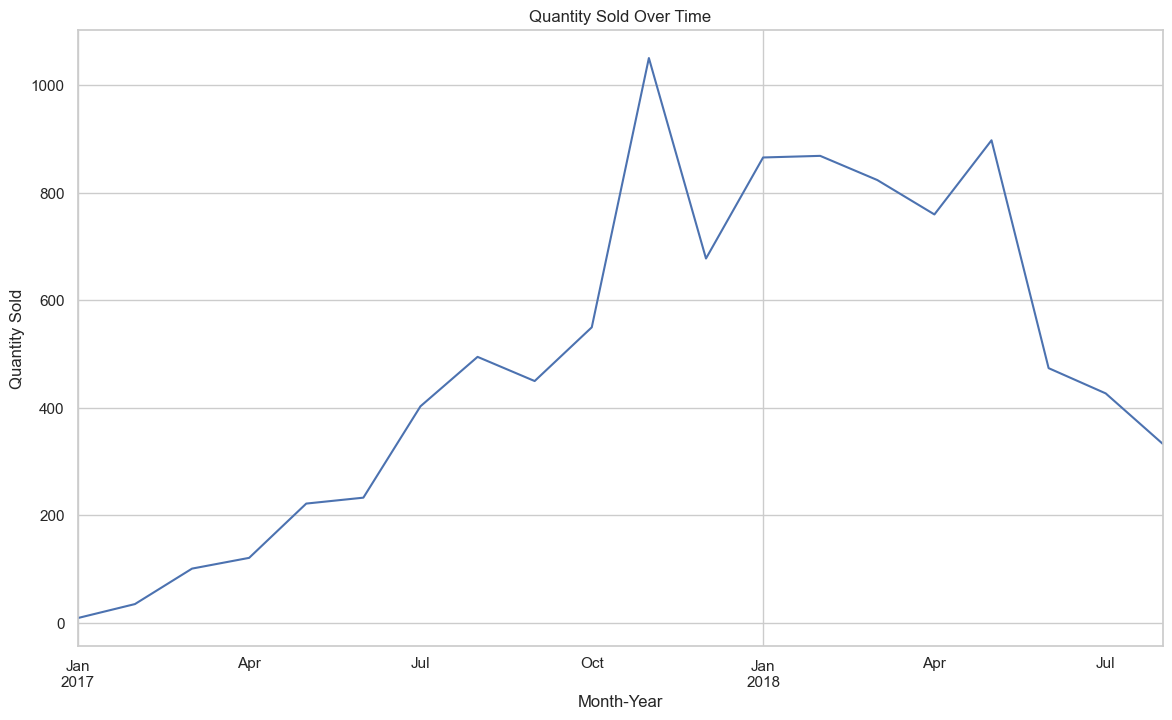

In [18]:
# Time Series Analysis: Quantity Sold Over Time
plt.figure(figsize=(14, 8))
data.groupby('month_year')['qty'].sum().plot()
plt.title('Quantity Sold Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

In [23]:
# Customer Segmentation: Using KMeans Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
# Selecting relevant features for clustering
clustering_data = data[['total_price', 'qty', 'unit_price']]

In [25]:
# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

In [26]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
# Adding cluster labels to the original data
data['cluster'] = clusters

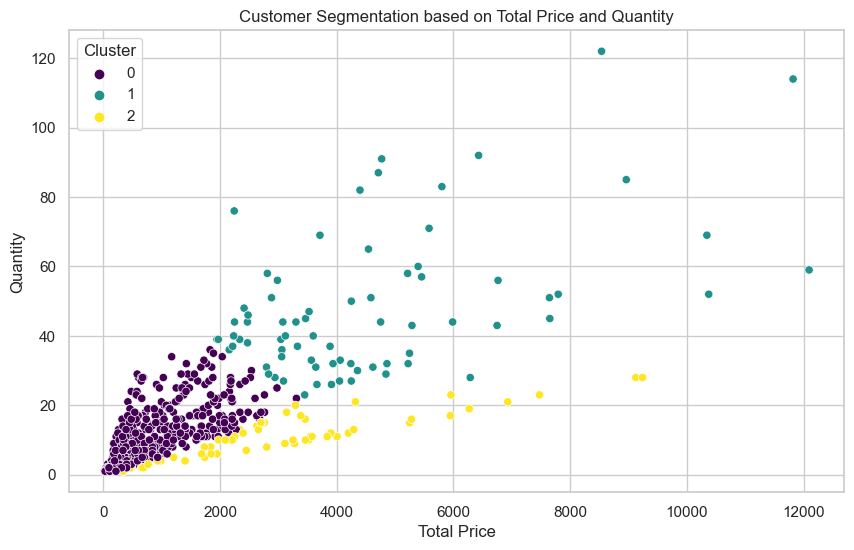

In [28]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_price', y='qty', hue='cluster', data=data, palette='viridis')
plt.title('Customer Segmentation based on Total Price and Quantity')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

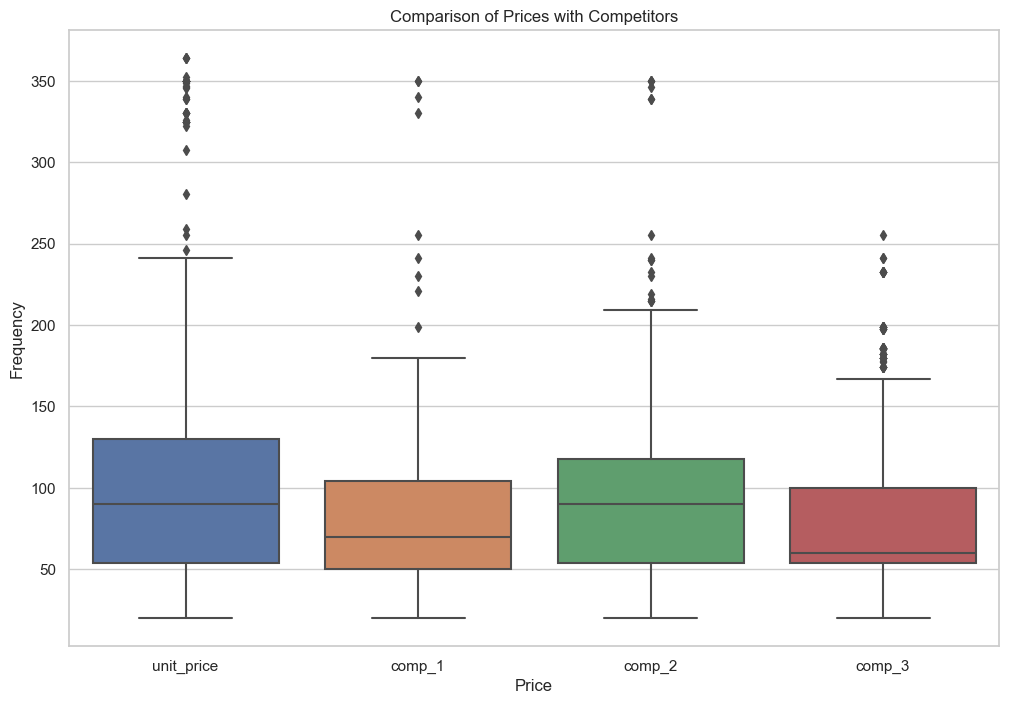

In [29]:
# Competitor Analysis: Comparison of Prices with Competitors
competitor_prices = data[['unit_price', 'comp_1', 'comp_2', 'comp_3']]

plt.figure(figsize=(12, 8))
sns.boxplot(data=competitor_prices)
plt.title('Comparison of Prices with Competitors')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()